In [1]:
install.packages("coin", repos='http://cran.us.r-project.org')


Installing package into ‘/users/anusri/R/R-4.0.3/lib/R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("coin", repos = "http://cran.us.r-project.org"):
“installation of package ‘coin’ had non-zero exit status”


In [2]:
rm(list=ls())
library(ggplot2)
library(ggridges)
library(coin)

Loading required package: survival



In [3]:
atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/bqtls_pu1_preds/snp_scores.tsv"
#dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_100M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_5M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_25M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_50M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_100M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_250M/bqtls_pu1_preds/snp_scores.tsv"

data=read.table(atac_preds,header=TRUE,sep='\t')

#data=read.table(dnase_preds,header=TRUE,sep='\t')

In [4]:
head(data)

,CHR,POS0,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,chr17,18967175,A,G,"538,418,120,0.223048327137546,0.866698726111294,2.33185325022481e-251",0.136640550,92.03166,0.048008578
2,chr4,176935912,C,A,"626,597,29,0.0463258785942492,0.543948896152333,4.44964286369012e-162",0.818361760,566.36725,0.214545893
3,chr1,144534082,C,T,"618,368,250,0.40453074433657,0.057294963055923,5.86306511316874e-141",-0.051241398,-64.96608,-0.030029855
4,chr17,19015380,T,A,"144,143,1,0.0069444444444444,0.87284967970842,1.04024977748099e-126",-0.009036064,-11.30258,-0.005145615
5,chr1,17231723,A,G,"2477,1321,1156,0.466693580944691,0.255194906706241,9.915947779278119e-114",0.097229004,22.16871,0.009661386
6,chr16,87705493,C,G,"115,105,10,0.0869565217391304,0.934801513753316,1.1950594841671001e-111",1.230484000,489.74042,0.212987598


In [5]:
library(stringr)

data[c('Depth', 'ALTdepth', 'REFDepth', 'POSTfreq', 'prechipfreq', 'pvalue')] <- str_split_fixed(data$META_DATA, ',', 6)


In [6]:
head(data)

,CHR,POS0,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff,Depth,ALTdepth,REFDepth,POSTfreq,prechipfreq,pvalue
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr17,18967175,A,G,"538,418,120,0.223048327137546,0.866698726111294,2.33185325022481e-251",0.136640550,92.03166,0.048008578,538,418,120,0.223048327137546,0.866698726111294,2.33185325022481e-251
2,chr4,176935912,C,A,"626,597,29,0.0463258785942492,0.543948896152333,4.44964286369012e-162",0.818361760,566.36725,0.214545893,626,597,29,0.0463258785942492,0.543948896152333,4.44964286369012e-162
3,chr1,144534082,C,T,"618,368,250,0.40453074433657,0.057294963055923,5.86306511316874e-141",-0.051241398,-64.96608,-0.030029855,618,368,250,0.40453074433657,0.057294963055923,5.86306511316874e-141
4,chr17,19015380,T,A,"144,143,1,0.0069444444444444,0.87284967970842,1.04024977748099e-126",-0.009036064,-11.30258,-0.005145615,144,143,1,0.0069444444444444,0.87284967970842,1.04024977748099e-126
5,chr1,17231723,A,G,"2477,1321,1156,0.466693580944691,0.255194906706241,9.915947779278119e-114",0.097229004,22.16871,0.009661386,2477,1321,1156,0.466693580944691,0.255194906706241,9.915947779278119e-114
6,chr16,87705493,C,G,"115,105,10,0.0869565217391304,0.934801513753316,1.1950594841671001e-111",1.230484000,489.74042,0.212987598,115,105,10,0.0869565217391304,0.934801513753316,1.1950594841671001e-111


In [13]:
tf="sp1"
data$sig=data$pvalue<5e-5
data$sig=factor(data$sig)
sig_logratio=data$probs_jsd_diff[data$sig==TRUE]
num_sig=length(sig_logratio)
non_sig_logratio=data$probs_jsd_diff[data$sig==FALSE]
num_non_sig=length(non_sig_logratio)

#test <- wilcox_test(abs(probs_jsd_diff)~sig,data=data,conf.level=0.99,conf.int=TRUE,paired=TRUE)

p = ggplot(data, aes(abs(probs_jsd_diff), colour=sig)) +
  stat_ecdf(size=1)+
  scale_color_manual(values=c("#e41a1c","#377eb8a0"))+
  xlab("JSD")+
  ylab("CDF")+
  ggtitle(paste(tf, ' p-val<5e-5 (n=',num_sig,' \n vs p-val>5e-5 (n=',num_non_sig,sep=''))+
  theme_classic(15)+
  theme(legend.position="top")

ggsave("subfigs/bqtls_atac_significance_test.pdf",p)

Saving 6.67 x 6.67 in image



In [8]:
test


	Asymptotic Wilcoxon-Mann-Whitney Test

data:  abs(probs_jsd_diff) by sig (FALSE, TRUE)
Z = 15.266, p-value < 2.2e-16
alternative hypothesis: true mu is not equal to 0
99 percent confidence interval:
 0.001881604 0.002727268
sample estimates:
difference in location 
           0.002294477 



	Asymptotic Wilcoxon-Mann-Whitney Test

data:  probs_jsd_diff by sig (FALSE, TRUE)
Z = 5.0018, p-value = 5.68e-07
alternative hypothesis: true mu is not equal to 0
99 percent confidence interval:
 0.001031597 0.003359883
sample estimates:
difference in location 
           0.002159809 


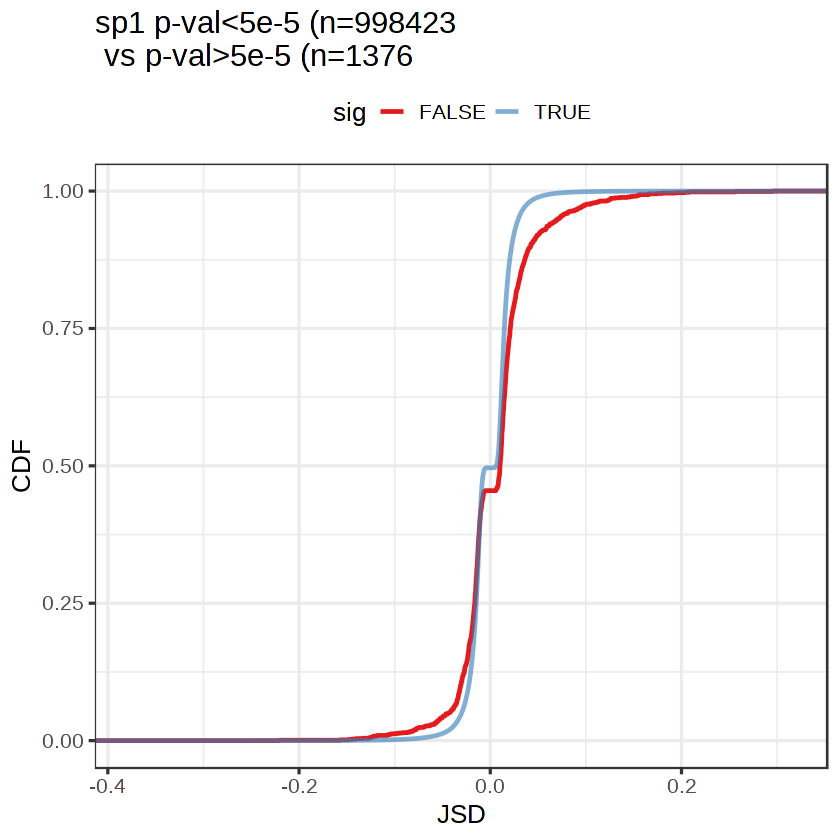

In [13]:
data$sig=data$pvalue<5e-5
data$sig=factor(data$sig)
sig_logratio=data$probs_jsd_diff[data$sig==TRUE]
num_sig=length(sig_logratio)
non_sig_logratio=data$probs_jsd_diff[data$sig==FALSE]
num_non_sig=length(non_sig_logratio)

wilcox_test(probs_jsd_diff~sig,data=data,conf.level=0.99,conf.int=TRUE)

ggplot(data, aes(probs_jsd_diff, colour=sig)) +
  stat_ecdf(size=1)+
  scale_color_manual(values=c("#e41a1c","#377eb8a0"))+
  xlab("JSD")+
  ylab("CDF")+
  ggtitle(paste(tf, ' p-val<5e-5 (n=',num_sig,' \n vs p-val>5e-5 (n=',num_non_sig,sep=''))+
  theme_bw(15)+
  theme(legend.position="top")


	Asymptotic Wilcoxon-Mann-Whitney Test

data:  abs(log_counts_diff) by sig (FALSE, TRUE)
Z = 14.347, p-value < 2.2e-16
alternative hypothesis: true mu is not equal to 0
99 percent confidence interval:
 0.006216036 0.009830238
sample estimates:
difference in location 
           0.007900004 


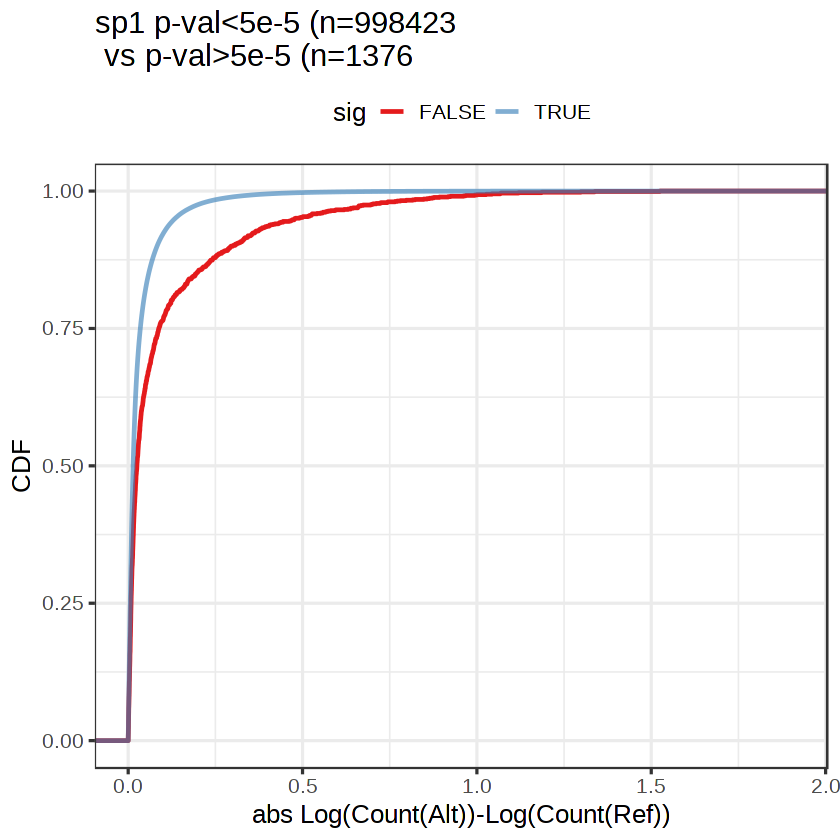

In [14]:
#print(data)
data$sig=factor(data$sig)
sig_logratio=abs(data$log_counts_diff[data$sig==TRUE])
num_sig=length(sig_logratio)
non_sig_logratio=abs(data$log_counts_diff[data$sig==FALSE])
num_non_sig=length(non_sig_logratio)
#ks.test(sig_delta,non_sig_delta)
wilcox_test(abs(log_counts_diff)~sig,data=data,conf.level=0.99,conf.int=TRUE)
ggplot(data, aes(abs(log_counts_diff), colour =sig)) +
  stat_ecdf(size=1)+
  scale_color_manual(values=c("#e41a1c","#377eb8a0"))+
  xlab("abs Log(Count(Alt))-Log(Count(Ref))")+
  ylab("CDF")+
  ggtitle(paste(tf, ' p-val<5e-5 (n=',num_sig,' \n vs p-val>5e-5 (n=',num_non_sig,sep=''))+
  theme_bw(15)+
  theme(legend.position="top")